# Project: Investigate a Dataset - No-Show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This investigation is aimed to study and explore the data of appointments in brazil. In this dataset, we will investigate the different charecteristics of patients who show up to their appointments vs the patients who missed their appointments. The dataset has number of columns with different variables pertaining to the patient and their apointments. The focus will be on the dependent variables (Age and Gender) and other variables such as day of week, time of day, conditions, neighbourhood and conditions present.

The columns that are present in data were as follows:
* PatientId
* AppointmentID
* Gender
* ScheduledDay : The date of the actual appointment
* AppointmentDay : The date the appointment was made
* Age
* Neighbourhood : Appointment location
* Scholarship : True/False Whether the patient was on the welfare program
* Hipertension : True/False
* Diabetes : True/False
* Alcoholism : True/False
* Handcap : 0-4 (0 = No Handcap, 1 one disability, 2-4 multiple disabilities)
* SMS_received : True/False
* No-show : Yes/No


### Question(s) for Analysis

In order to identify the charecteristics of appointment no-shows, these questions have been formulated based on the data available:

1. Do certain days of the month get missed more than other days? Trying to see if no-shows correlate with type of day (weekend vs workday)
2. Do certain neighborhoods miss more appointments on average? Trying to see if no-shows correlate with location.
3. Which gender is more prone to miss appointments?
5. Do more patients show up when SMS received? 
6. How many appointments are there per each unique patient ID, and how many of those are no-shows?

By answering these questions, it will be possible to find factors that might predict the appointment no-shows.


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# I have added the datetime module so that i can determine the day name of the date (e.g. Monday, Tuesday, etc.) and see if it's weekend or business day.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date, time, datetime

% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties
The dataset has been downloaded as `appointments_data.csv`, and has been loaded a dataframe variable `df_main` . it has the following properties:
1. The dataframe has 14 columns.
2. The dataframe has 110,527 rows.
3. There are no missing data in the dataframe.
4. The dataframe has no duplicate rows. However, removing removing the appointment ID column will result in a dataframe with duplicate rows.




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_main = pd.read_csv('appointments_data.csv')
df_main.shape

(110527, 14)

In [3]:
# Checking for data types and count info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Checking for duplicated values
df_main.duplicated().sum()

0


### Data Cleaning
From initial observation, we can see that there are no missing data, and the dataset is free from duplicates. The PatientID column seems to be confusing to read since the dataframe is reading it as a number but it doesn't matter as long as we can identify rows with similar ID.

#### A. Columns dropped:
> The appointment ID column was keeping the data unique, dropping the column caused 618 entries to become duplicates.
* The AppointmentDay column will be dropped since we're only interested in the actual appointment date and not when it was made


#### B. Types changed:
* The patient ID will be transformed to a string type.
* The ScheduledDay column will be transformed to a datetime type. 

#### C. Columns simplified:
* The Neighbourhood column will be renamed to Location.
* No-show column will be renamed to no_show.
* Will add a column to specify if the day is a weekend or not.
* The Age column will be transformed to a categorical type `['old','middle','young','child']` based on 20 year bins.: 0-19, 20-39, 40-59, 60+
* A "Conditions" column combining all conditions will be added to the dataframe, replacing the original columns `Hipertension, Diabetes, Alcoholism, Handcap`.

### Data Cleaning: A. Dropping columns

In [5]:
# dropping the appointment id column and appointment day column
df_main.drop(['AppointmentDay'], axis=1, inplace = True)
df_main.duplicated().sum()


0

### Data Cleaning: B. Types changed

In [6]:
# Transforming the type of patient id to string, and removing the '.0' from the end of the string
df_main.PatientId = df_main.PatientId.astype(str)
df_main.PatientId = df_main.PatientId.apply(lambda x: x.replace('.0', ''))
df_main.head()


,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Transforming the ScheduledDay to datetime
df_main.ScheduledDay = pd.to_datetime(df_main.ScheduledDay)
df_main.head()


,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning: C. Columns simplified

In [8]:
# renaming the neighborhood column to location
df_main.rename(columns={'Neighbourhood':'Location'}, inplace=True)
df_main.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# renaming No-show to no_show
df_main.rename(columns={'No-show':'no_show'}, inplace=True)
df_main.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# will add a column to the dataframe that will be used to check if the scheduled date was a weekend
df_main['day'] = df_main.ScheduledDay.dt.day_name()
df_main.groupby('day').no_show.describe()

,count,unique,top,freq
day,,,,
Friday,18915,2,No,15028
Monday,23085,2,No,18524
Saturday,24,2,No,23
Thursday,18073,2,No,14373
Tuesday,26168,2,No,20877
Wednesday,24262,2,No,19383


In [11]:
# Splitting the scheduledday into Date column and time column
df_main['Date'] = df_main.ScheduledDay.dt.date
df_main['Time'] = df_main.ScheduledDay.dt.time
df_main.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,day,Date,Time
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,2016-04-29,16:07:23


In [12]:
# Changing the age column to categorical data, 0-19, 20-39, 40-59, 60+
# I could use lambda but defining a function is cleaner
def age_category(age):
    if type(age) == type(str()):
        return age
    if age <0:
        return None
    # we make sure to only include valid ages: 0 (newborn) and above. this will automatically exclude the negative values
    if 0 <= age < 20:
        return '0-19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    else:
        return '60+'
df_main.Age = df_main.Age.apply(age_category)
df_main.head()


,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,day,Date,Time
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,60+,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,40-59,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,60+,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,0-19,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,40-59,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,2016-04-29,16:07:23


In [13]:
df_main.isnull().sum()

PatientId        0
AppointmentID    0
Gender           0
ScheduledDay     0
Age              1
Location         0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
no_show          0
day              0
Date             0
Time             0
dtype: int64

In [14]:
df_main.dropna(inplace=True)
df_main.isnull().sum()

PatientId        0
AppointmentID    0
Gender           0
ScheduledDay     0
Age              0
Location         0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
no_show          0
day              0
Date             0
Time             0
dtype: int64

In [15]:
# Combining columns from Hipertension through Handcap into "Conditions" column


# Correcting the spelling errors by renaming columns Hipertension to Hypertension and Handcap to Handicap
if 'Hipertension' in df_main.columns:
    # Adding a new column to the dataframe that will be used to check if the patient has any conditions
    df_main['Conditions'] = ''
    
    df_main.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

    # Conditions list
    conditions = ["Hypertension", "Handicap", "Diabetes", "Alcoholism"]

    # Adding the conditions to the Conditions column
    for con in conditions:
        df_main['Conditions'] +=df_main[con].apply(lambda x: con+' ' if x == 1 else '')

    # replacing empty cells in conditions with None
    df_main['Conditions'] = df_main['Conditions'].apply(lambda x: 'No conditions' if x == '' else x)
    # Dropping the columns that are not needed anymore
    df_main.drop(conditions, axis=1, inplace=True)


df_main.head()


,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,SMS_received,no_show,day,Date,Time,Conditions
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,60+,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,18:38:08,Hypertension
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,40-59,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,16:08:27,No conditions
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,60+,MATA DA PRAIA,0,0,No,Friday,2016-04-29,16:19:04,No conditions
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,0-19,PONTAL DE CAMBURI,0,0,No,Friday,2016-04-29,17:29:31,No conditions
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,40-59,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,16:07:23,Hypertension Diabetes


In [16]:
# changing the time column to only include the hours
df_main['Time'] = df_main.Time.apply(lambda x: x.hour)
df_main.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Location,Scholarship,SMS_received,no_show,day,Date,Time,Conditions
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,60+,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,18,Hypertension
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,40-59,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,16,No conditions
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,60+,MATA DA PRAIA,0,0,No,Friday,2016-04-29,16,No conditions
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,0-19,PONTAL DE CAMBURI,0,0,No,Friday,2016-04-29,17,No conditions
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,40-59,JARDIM DA PENHA,0,0,No,Friday,2016-04-29,16,Hypertension Diabetes


In [17]:
df_main['day_of_week'] = df_main.ScheduledDay.apply(lambda x: x.strftime('%A'))
df_main.drop(['ScheduledDay','Scholarship'], axis=1, inplace=True)
df_main.head()



,PatientId,AppointmentID,Gender,Age,Location,SMS_received,no_show,day,Date,Time,Conditions,day_of_week
0,29872499824296,5642903,F,60+,JARDIM DA PENHA,0,No,Friday,2016-04-29,18,Hypertension,Friday
1,558997776694438,5642503,M,40-59,JARDIM DA PENHA,0,No,Friday,2016-04-29,16,No conditions,Friday
2,4262962299951,5642549,F,60+,MATA DA PRAIA,0,No,Friday,2016-04-29,16,No conditions,Friday
3,867951213174,5642828,F,0-19,PONTAL DE CAMBURI,0,No,Friday,2016-04-29,17,No conditions,Friday
4,8841186448183,5642494,F,40-59,JARDIM DA PENHA,0,No,Friday,2016-04-29,16,Hypertension Diabetes,Friday


In [18]:
''' This section willbe used to prepare the data specifically for the 1st question. The question is looking to investigate if there are more days missed than the others.
    This is a multi variable question where I will be looking at missed appointments on days and times of each day. Before doing that, I wanted to pull the time of the day,
    for each day of week and compare the number of missed appointments (No-show) to the number of attended appointments (Show).
'''

# This is a nested loop to get the time of the day for each day of the week. 
# This will help me build a dictionary which i can later convert to a dataframe 
#  that would have weekdays as columns, and times of day as row indices.
#  Each cell represents the count of appointments for the day on that time of day.

# Outer loop goes through Show and No-show option values
for pat_show in ['Yes', 'No']:
    # initiate a dictionary to store the data
    dict_time = {}

    # first level inner loop: looping through days of week
    for day in df_main['day_of_week'].unique():
        # making a key with the day of key, which is another dictionary to store the times of this day
        dict_time[day] = {}

        # Prior to getting to the innermost loop, the variable day_times is made where to get the 'Show/No-show' rows using query, grouped by day of week, and then get the time for each group/day
        #  This is a groupby_series object saved in the variable day_times. @pat_show is the value of the Show/No-show in iteration, day is the day of the week in the iteration
        day_times = df_main.query('no_show == @pat_show').groupby('day_of_week').Time.get_group(day)

        # second level innermost loop: looping through times of day for one particular day, i is each time in the day_times index (times of day)
        for i in day_times.value_counts().index:

            # To maintain equivalent dataframe sizes, we want to populate the dictionary with all the times, and fill missing times with 0
            if i not in dict_time[day]:
                dict_time[day][i] = 0

            # adding the count of appointments for the time of day to the dictionary
            dict_time[day][i] += day_times.value_counts()[i]

    # After exiting the innermost loop and the first level inner loop, the dictionary is converted to a dataframe accordingly
    # populating the dataframes with dictionary data of no-show and show patients
    if pat_show == 'Yes':    
        # Declaring the dataframe with the nested dictionary
        df_no_show = pd.DataFrame(dict_time)

        # declaring variable with times of day
        order_times = list(df_main.Time.unique())
        # Sorting the time list in ascending order
        order_times.sort()

        # reordering the data frame according to time of day
        df_no_show = df_no_show.reindex(order_times)

    # repeating the process
    else:
        df_show = pd.DataFrame(dict_time)
        order_times = list(df_main.Time.unique())
        order_times.sort()
        df_show = df_show.reindex(order_times)

df_show


,Friday,Wednesday,Tuesday,Thursday,Monday,Saturday
6,283.0,291,232.0,242.0,227,NaN
7,3044.0,3548,4052.0,2696.0,2958,4.0
8,2449.0,2849,2805.0,1869.0,2571,1.0
9,1661.0,2265,2459.0,1608.0,2299,5.0
10,1558.0,1926,1899.0,1421.0,1809,3.0
11,1106.0,1509,1475.0,968.0,1472,4.0
12,600.0,842,1239.0,624.0,1013,NaN
13,1103.0,1669,1721.0,1209.0,1442,1.0
14,1131.0,1565,1672.0,1134.0,1554,1.0
15,966.0,1373,1464.0,1089.0,1311,3.0


In [19]:

# combine the show and now dataframes
df_show_no_show = pd.concat([df_show, df_no_show], axis=1)

# make them alternate between show and no show, the days are added manually to preserve the order
df_alt  = df_show_no_show[['Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

# Create the new day columns with show/no-show subcolumns
mult_index = pd.MultiIndex.from_product([df_alt.columns.unique(), ['Show', 'No-show']])

# populating the dataframe with the df_alt data
df_time_day = pd.DataFrame(df_alt.values, index=order_times, columns=mult_index)

df_time_day.fillna(0, inplace=True)
df_time_day



Saturday          Monday         Tuesday         Wednesday          \
       Show No-show    Show No-show    Show No-show      Show No-show   
6       0.0     0.0   227.0    46.0   232.0    90.0     291.0    60.0   
7       4.0     0.0  2958.0   500.0  4052.0   736.0    3548.0   656.0   
8       1.0     0.0  2571.0   508.0  2805.0   623.0    2849.0   631.0   
9       5.0     1.0  2299.0   520.0  2459.0   576.0    2265.0   578.0   
10      3.0     0.0  1809.0   409.0  1899.0   599.0    1926.0   553.0   
11      4.0     0.0  1472.0   463.0  1475.0   433.0    1509.0   385.0   
12      0.0     0.0  1013.0   290.0  1239.0   278.0     842.0   235.0   
13      1.0     0.0  1442.0   393.0  1721.0   461.0    1669.0   383.0   
14      1.0     0.0  1554.0   426.0  1672.0   482.0    1565.0   456.0   
15      3.0     0.0  1311.0   405.0  1464.0   447.0    1373.0   424.0   
16      1.0     0.0   983.0   293.0   994.0   286.0     835.0   329.0   
17      0.0     0.0   528.0   223.0   530.0   167.0     433.0   107.0   
18      0.0     0.0   217.0    49.0   239.0    81.0     191.0    49.0   
19      0.0     0.0   127.0    32.0    74.0    22.0      70.0    28.0   
20      0.0     0.0    11.0     4.0    22.0     9.0      16.0     5.0   
21      0.0     0.0     1.0     0.0     0.0     1.0       1.0     0.0   

   Thursday          Friday          
       Show No-show    Show No-show  
6     242.0    41.0   283.0    66.0  
7    2696.0   489.0  3044.0   530.0  
8    1869.0   410.0  2449.0   632.0  
9    1608.0   409.0  1661.0   442.0  
10   1421.0   439.0  1558.0   440.0  
11    968.0   299.0  1106.0   348.0  
12    624.0   151.0   600.0   150.0  
13   1209.0   333.0  1103.0   321.0  
14   1134.0   380.0  1131.0   326.0  
15   1089.0   294.0   966.0   303.0  
16    766.0   230.0   646.0   179.0  
17    419.0   137.0   277.0    88.0  
18    252.0    62.0   156.0    44.0  
19     59.0    23.0    44.0     9.0  
20     17.0     3.0     4.0     9.0  
21      0.0     0.0     0.0     0.0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do certain days of the week get missed more than other days?

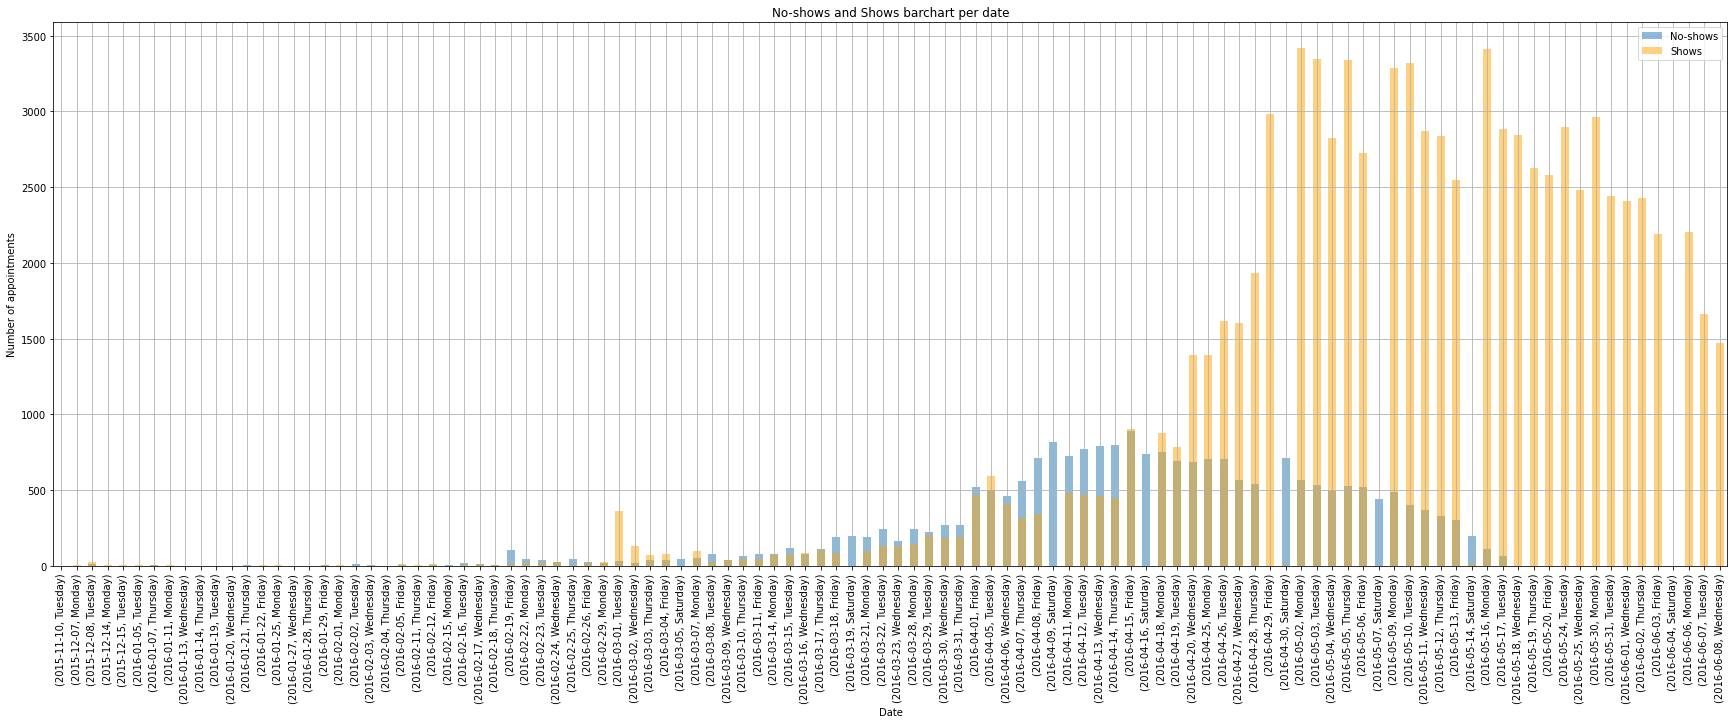

In [20]:
df_main.query('no_show == "Yes"').groupby('Date').day_of_week.value_counts().plot(kind = 'bar', figsize = (30,10), alpha = 0.5, label = 'No-shows', grid = True)
df_main.query('no_show == "No"').groupby('Date').day_of_week.value_counts().plot(kind = 'bar', figsize = (30,10), color = 'orange', alpha = 0.5, label = 'Shows', grid = True)
plt.title('No-shows and Shows barchart per date')
plt.xlabel('Date')
plt.ylabel('Number of appointments')
plt.legend()
plt.show()
# This is just for the sake of the visualization, to get an overview of how to shows and no-shows are distributed in the recorded time line of November 2015 till June 2016.



In [21]:
# df_time_day_pct to calculate the percentages of times of day for each day of week
df_time_day_pct = round(df_time_day/df_time_day.sum() * 100)

# maximum percent of show and no-shows for each day of week
df_time_day_pct.max()


Saturday   Show        22.0
           No-show    100.0
Monday     Show        16.0
           No-show     11.0
Tuesday    Show        19.0
           No-show     14.0
Wednesday  Show        18.0
           No-show     13.0
Thursday   Show        19.0
           No-show     13.0
Friday     Show        20.0
           No-show     16.0
dtype: float64

From the display of the time-day percentage, we can see that the maximum value of no-shows was towards the weekend, specifically on Friday. Saturday can be considered as an outlier as only one appointment was made and missed.

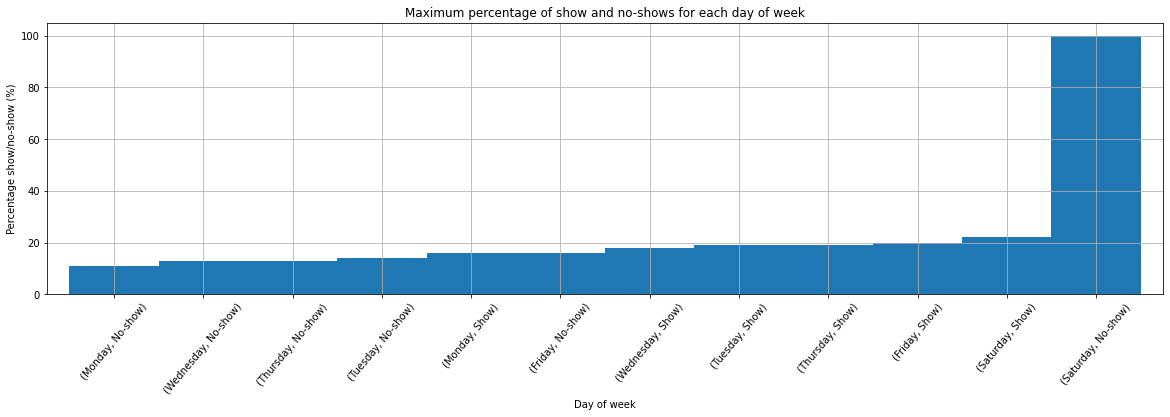

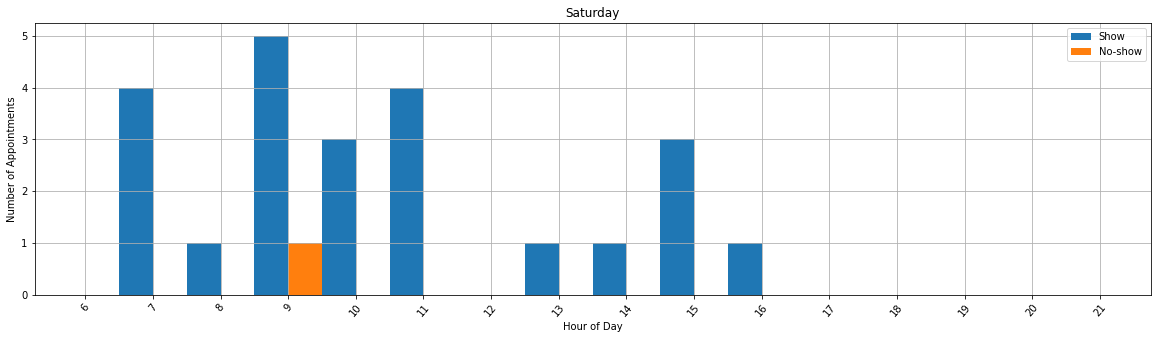

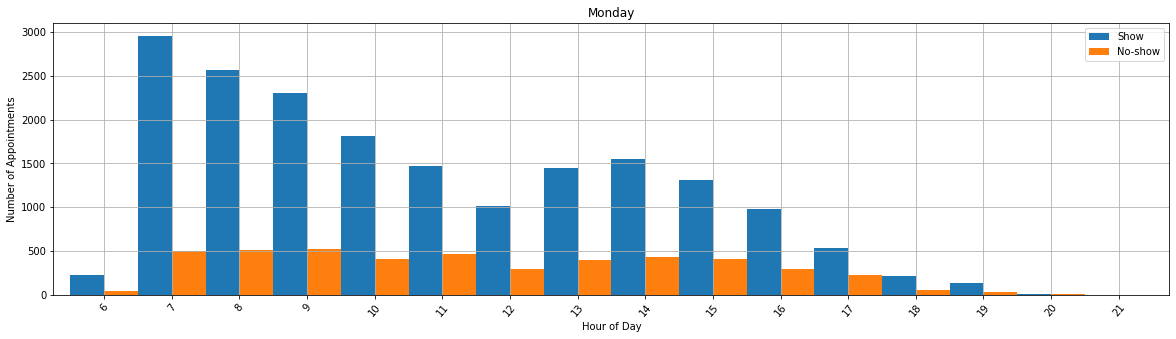

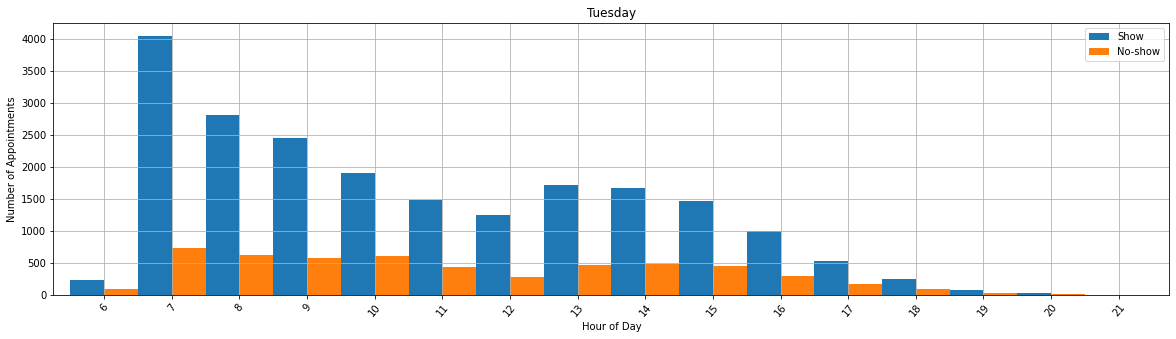

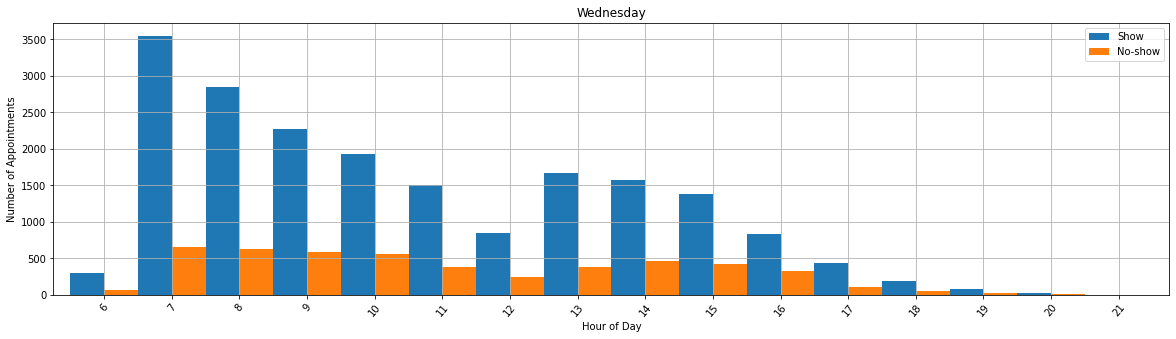

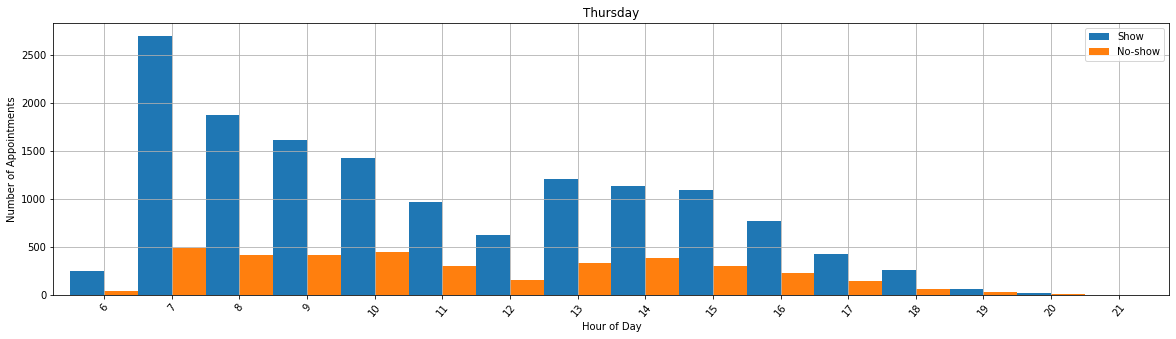

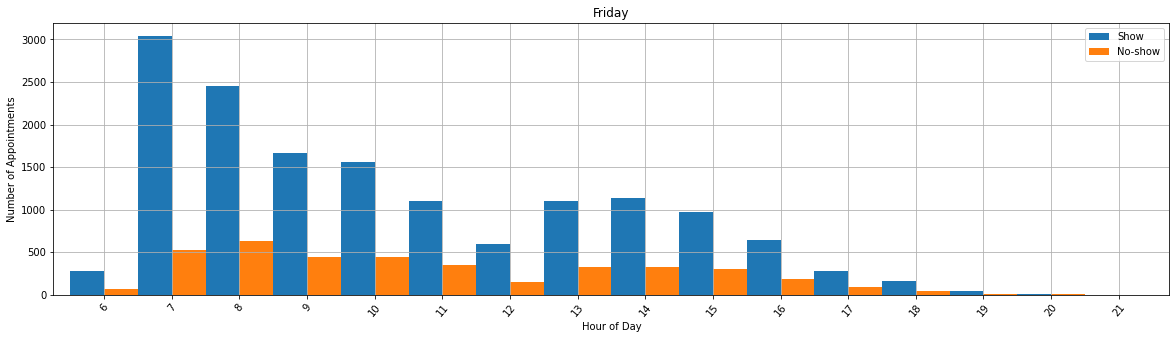

In [22]:
df_time_day_pct.max().sort_values().plot(kind = 'bar', figsize = (20,5), width = 1, grid = True)
plt.xticks(rotation=50)
plt.title('Maximum percentage of show and no-shows for each day of week')
plt.xlabel('Day of week')
plt.ylabel('Percentage show/no-show (%)')
plt.show()
# plot df_time_day bar chart for each time on each day of week
weekdays = ['Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for day in weekdays:
    df_time_day[day].plot(kind = 'bar', figsize = (20,5), width = 1, grid = True)
    plt.title(day)

    plt.xticks(rotation=50)
    plt.title(day)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Appointments')

    plt.show()





In [23]:
df_time_day_pct.max().sort_values(ascending = False)

Saturday   No-show    100.0
           Show        22.0
Friday     Show        20.0
Tuesday    Show        19.0
Thursday   Show        19.0
Wednesday  Show        18.0
Monday     Show        16.0
Friday     No-show     16.0
Tuesday    No-show     14.0
Wednesday  No-show     13.0
Thursday   No-show     13.0
Monday     No-show     11.0
dtype: float64

### Research Question 2:  Do certain neighbourhoods miss more appointments?


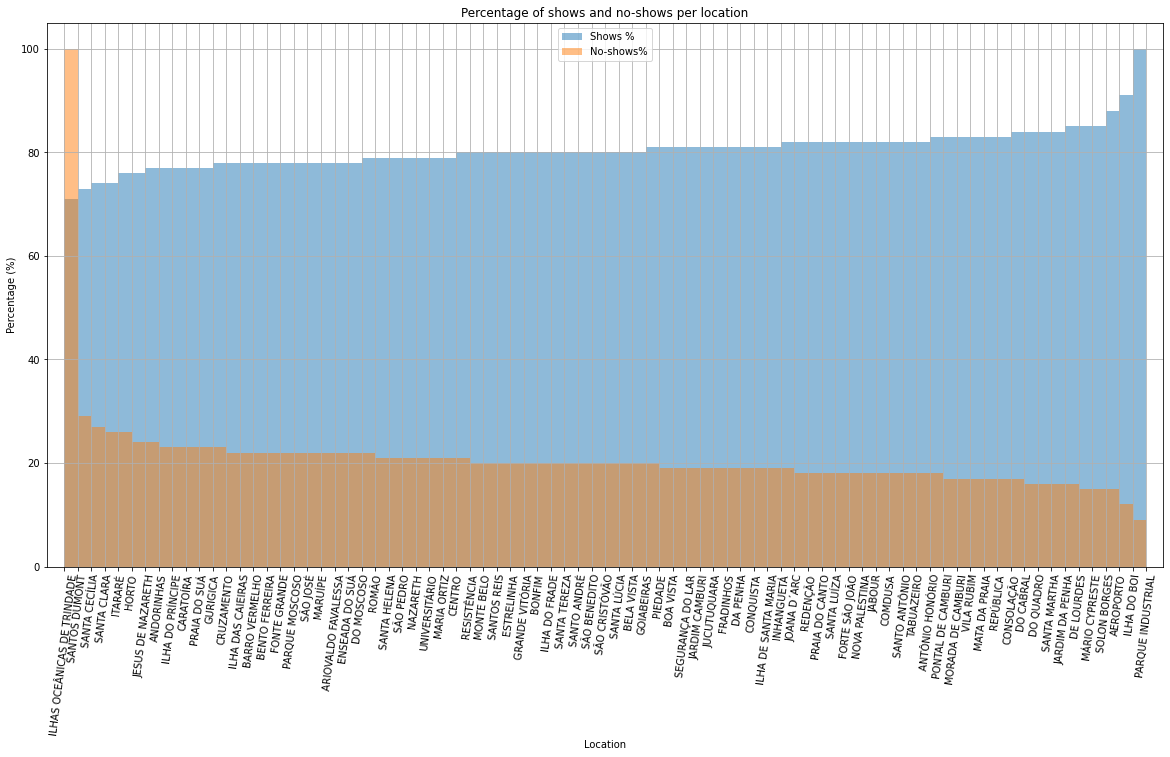

,No-shows,Shows,Total
ILHAS OCEÂNICAS DE TRINDADE,100.0,0.0,2
SANTOS DUMONT,29.0,71.0,1276
SANTA CECÍLIA,27.0,73.0,448
SANTA CLARA,26.0,74.0,506
ITARARÉ,26.0,74.0,3514
HORTO,24.0,76.0,175
JESUS DE NAZARETH,24.0,76.0,2853
ANDORINHAS,23.0,77.0,2262
ILHA DO PRÍNCIPE,23.0,77.0,2266
CARATOÍRA,23.0,77.0,2565


In [24]:
no_show_loc = df_main.query('no_show == "Yes"').Location.value_counts()
show_loc = df_main.query('no_show == "No"').Location.value_counts()

# no_show_loc.plot(kind='bar', figsize=(30,15), xlabel='Location vs Number of No-shows', color ='green', subplots = True, legend = True)
# show_loc.plot(kind='bar', figsize=(30,15), xlabel='Location vs Number of Shows', color = 'olive', alpha = 0.5, subplots = True, legend = True)
# plt.legend(['No-shows', 'Shows'])

# create new df_loc_pct with the percentage of no-shows and shows per location
df_loc_pct = pd.DataFrame(columns=['No-shows', 'Shows'])
df_loc_pct['Total'] = df_main['Location'].value_counts()
df_loc_pct['No-shows'] = round(no_show_loc / df_loc_pct['Total'] *100) 
df_loc_pct['Shows'] = round(show_loc /  df_loc_pct['Total'] *100 )
df_loc_pct.fillna(0, inplace=True)

# order the df_loc_pct by the percent of no-shows
df_loc_pct = df_loc_pct.sort_values(by='No-shows', ascending=False)

df_loc_pct.plot(kind ='bar', width = 2, y = ['Shows', 'No-shows'],figsize = (20,10), legend = True, alpha = 0.5)
plt.legend(['Shows %', 'No-shows%' ])
plt.xticks(rotation=83)
plt.grid(True)
plt.title('Percentage of shows and no-shows per location')
plt.xlabel('Location')
plt.ylabel('Percentage (%)')

plt.show()
df_loc_pct.head(20)


The bar chart above shows the percentage of appointments missed vs unmissed appointments for each neighborhood. The appointments that had 100% no-shows or 0% no-shows are considered outliers for this percentage comparison, due to their small size in comparison to the sample size.

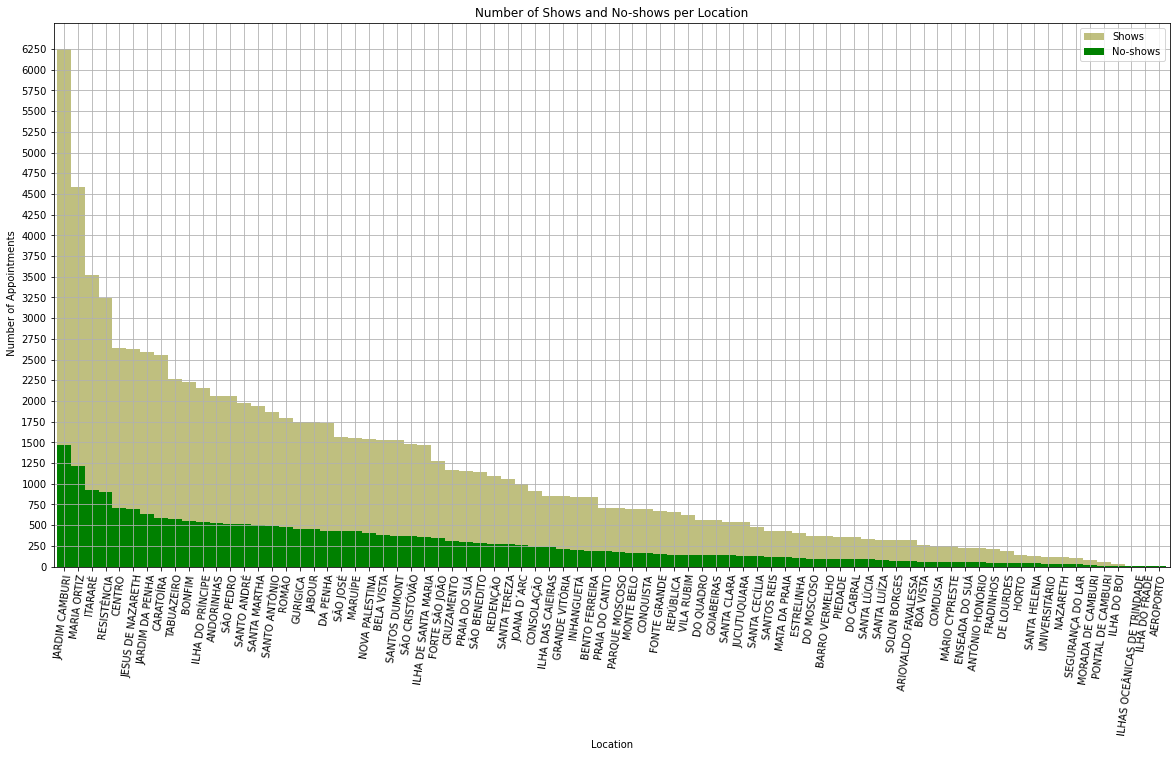

count      80.000000
mean      278.987500
std       278.000751
min         1.000000
25%        75.000000
50%       184.500000
75%       428.250000
max      1465.000000
Name: Location, dtype: float64

In [25]:

# plot show_loc and no_show_loc as a bar chart
show_loc.plot(kind='bar', figsize=(20,10), xlabel='Location vs Number of Shows', color = 'olive', alpha = 0.5, subplots = True, legend = True, width = 1)  
no_show_loc.plot(kind='bar', figsize=(20,10), xlabel='Location vs Number of No-shows', color = 'green', subplots = True, legend = True, width = 1)
plt.legend(['Shows', 'No-shows' ])
plt.yticks(np.arange(0, show_loc.max(), step=250))
plt.grid(True)
plt.xticks(rotation=83)
plt.title('Number of Shows and No-shows per Location')
plt.xlabel('Location')
plt.ylabel(' Number of Appointments')
plt.show()
no_show_loc.describe()
# Santos Dumont had highest percentage of no-shows to shows

The bar chart above shows the comparison of count of shows vs no-shows per location, this is to put in percpective the sample size of each location and compare the heights of bars to each other across all locations. Itarare missed 26% of it's appointments placing it 5th, and by total count of missed appointments was 3rd.

### Research Question 3:  Which gender is more prone to miss appointments?


For this question, we want to follow the trend rather than the percentage of each gender and age group. 

Age    Gender  no_show
0-19   F       No         12487
               Yes         3590
       M       No         11183
               Yes         3151
20-39  F       No         16047
               Yes         4850
       M       No          6143
               Yes         1830
40-59  F       No         16664
               Yes         3914
       M       No          7752
               Yes         1742
60+    F       No         12047
               Yes         2240
       M       No          5884
               Yes         1002
Name: no_show, dtype: int64


Text(0, 0.5, 'Count of appointments show/no-show')

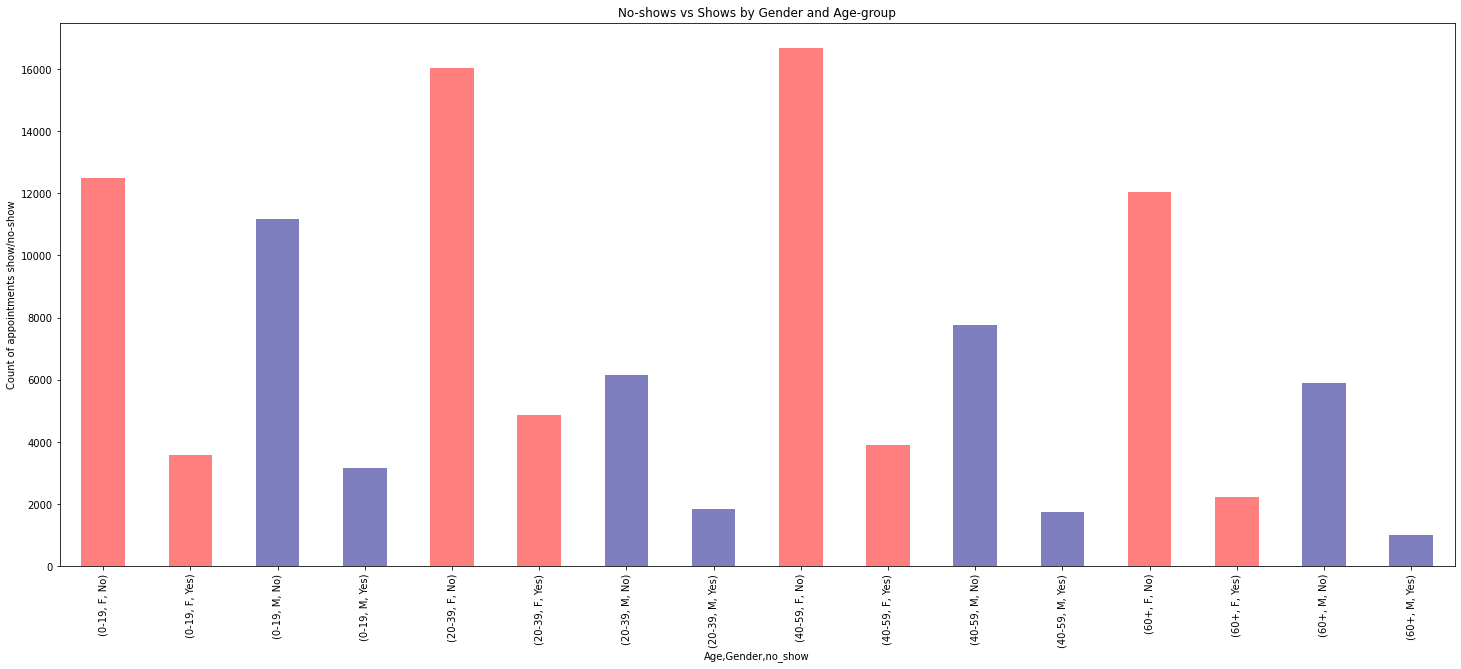

In [26]:


# PLotting the no_show by Gender and age group
ages = df_main.groupby('Age').groups.keys()
df_age_gender = df_main.groupby(['Age','Gender']).no_show.value_counts()
print(df_age_gender)
df_age_gender.plot(kind= 'bar', color = ['red','red','navy','navy'], alpha = 0.5, figsize = (25,10))
plt.title('No-shows vs Shows by Gender and Age-group')
plt.ylabel('Count of appointments show/no-show')

# on average, more females were no-shows, peaking during their 20-39 age.

The age group 0-19 can be overlooked since the patient was probably not in control of their decision (a parent made the decision for them, to show or book an appointment)
The following age groups show a clearer image of the gender behaviour when it comes to appointment shows and no shows since these are adults and are most likely in control of their decision.

From the bar chart above, we can see that amount of males who missed their appointments was gradually decreasing across all age-groups.
while the amount of females who missed their appointments peacked at the 20-39 age group, it decreased in the remaining age groups.

Significantly more females showed up to their appointments than male across all adult age groups.

### Research Question 4: Do more patients show up if they receive SMS? 

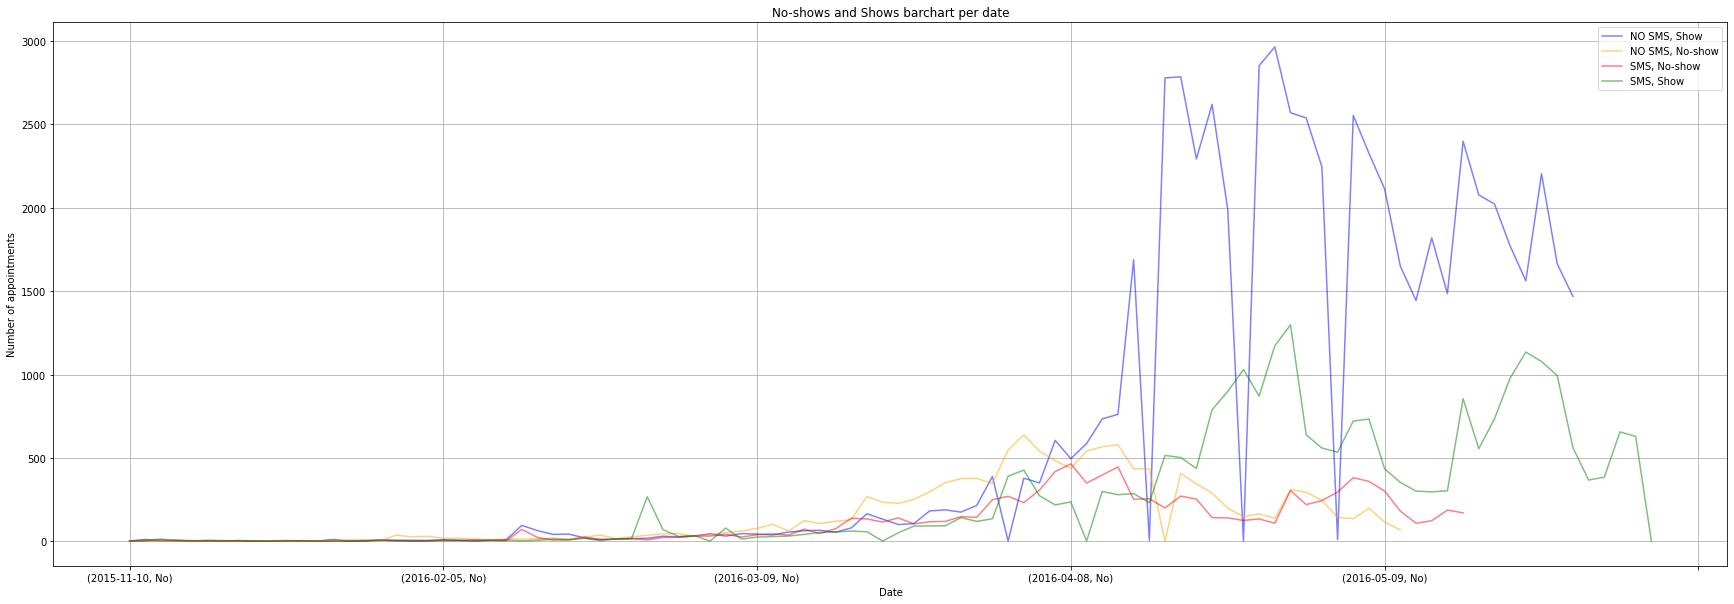

In [27]:
df_date_SMS = df_main.query('(no_show == "Yes") and (SMS_received == 1)').groupby('Date').no_show.value_counts()
df_date_no_SMS = df_main.query('(no_show == "Yes") and (SMS_received == 0)').groupby('Date').no_show.value_counts()
df_SMS_show = df_main.query('(no_show == "No") and (SMS_received == 1)').groupby('Date').no_show.value_counts()
df_no_SMS_show = df_main.query('(no_show == "No") and (SMS_received == 0)').groupby('Date').no_show.value_counts()

df_no_SMS_show.plot(kind = 'line', figsize = (30,10), color = 'blue', alpha = 0.5, label = 'NO SMS, Show', grid = True)
df_date_no_SMS.plot(kind = 'line', figsize = (30,10), color = 'orange', alpha = 0.5, label = 'NO SMS, No-show', grid = True)
df_date_SMS.plot(kind = 'line', figsize = (30,10), alpha = 0.5, label = 'SMS, No-show', grid = True, color = 'red')
df_SMS_show.plot(kind = 'line', figsize = (30,10), color = 'green', alpha = 0.5, label = 'SMS, Show', grid = True)

plt.title('No-shows and Shows barchart per date')
plt.xlabel('Date')
plt.ylabel('Number of appointments')
plt.legend()

# This is for general analysis of the data

In [28]:
df_sms = df_main.query('SMS_received == 1').no_show.value_counts()
df_sms_pct = df_sms/df_sms.sum() *100

df_no_sms = df_main.query('SMS_received == 0').no_show.value_counts()
df_no_pct = df_no_sms/df_no_sms.sum() *100



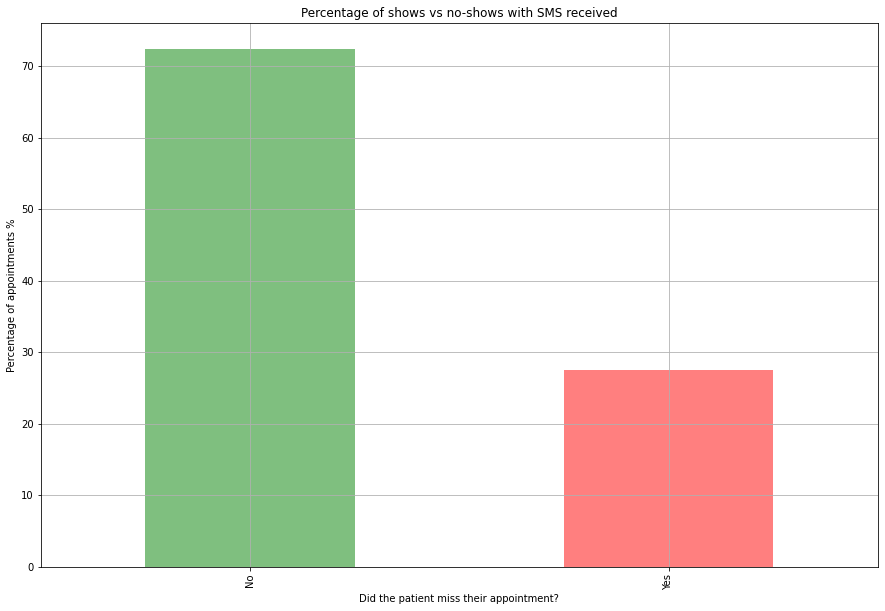

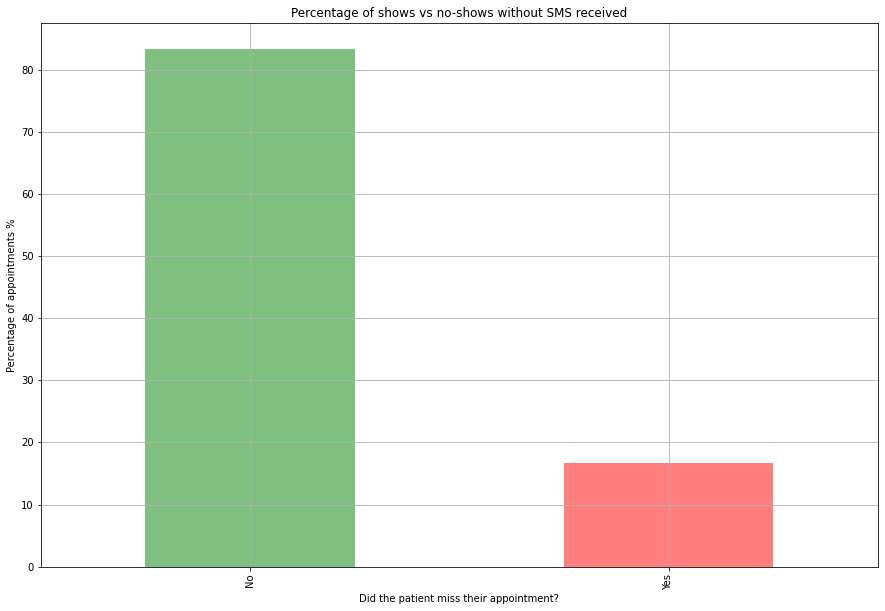

In [29]:
df_sms_pct.plot(kind = 'bar', color = ['green','red'], alpha = 0.5, figsize = (15,10), stacked = True, grid = True)
plt.title('Percentage of shows vs no-shows with SMS received')
plt.xlabel('Did the patient miss their appointment?')
plt.ylabel('Percentage of appointments %')
plt.show()
df_no_pct.plot(kind = 'bar', color = ['green','red'], alpha = 0.5, figsize = (15,10), stacked = True, grid = True)
plt.title('Percentage of shows vs no-shows without SMS received')
plt.xlabel('Did the patient miss their appointment?')
plt.ylabel('Percentage of appointments %')
plt.show()




After observing the previous bar chart percentages, it is inconclusive whether  or not the SMS affects the no-show rate (positively or negatively) exclusively. It seems that more people attend to the appointment without receiving SMS, as opposed to more people missing their appointments when they receive SMS.

Further study should be done to see on what days of the week SMS was received and how the no-show rate changes.

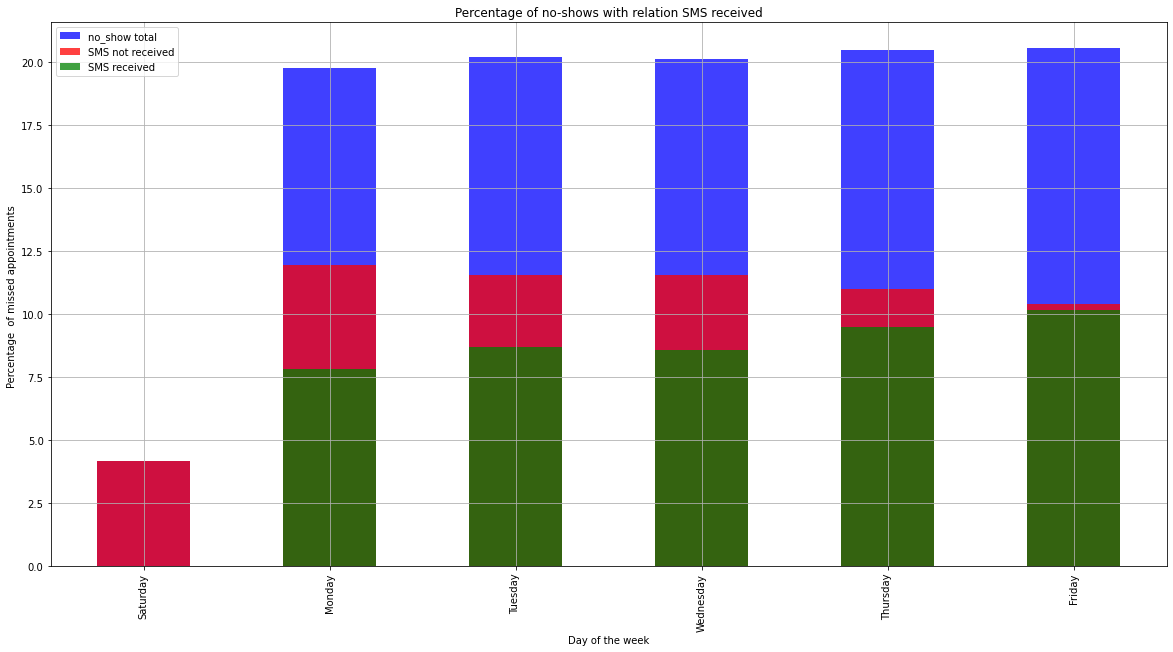

In [30]:
# dividing the number of no_shows by the total number of appointments, and grouping them by SMS received
df_sms_day = df_main.query('no_show == "Yes"').groupby('SMS_received').get_group(1).day.value_counts()/df_main.day.value_counts() *100
df_no_sms_day = df_main.query('no_show == "Yes"').groupby('SMS_received').get_group(0).day.value_counts()/df_main.day.value_counts() *100


df_no_show_day = df_main.query('no_show == "Yes"').day.value_counts()/df_main.day.value_counts() *100


# #plot line chart
df_no_show_day.reindex(weekdays).plot(kind = 'bar', figsize = (20,10), color = 'blue', alpha = 0.75, grid = True, label = 'no_show total')
df_no_sms_day.reindex(weekdays).plot(kind = 'bar', figsize = (20,10), color = 'red', alpha = 0.75, grid = True, label = 'SMS not received')
df_sms_day.reindex(weekdays).plot(kind = 'bar', figsize = (20,10), color = 'green', alpha = 0.75, grid = True, label = 'SMS received')
plt.legend()
plt.title('Percentage of no-shows with relation SMS received')
plt.xlabel('Day of the week')
plt.ylabel('Percentage  of missed appointments ')
plt.show()

In [31]:
# total percentage of no-shows 
df_no_show_day.reindex(weekdays)

Saturday      4.166667
Monday       19.758274
Tuesday      20.219352
Wednesday    20.109636
Thursday     20.472528
Friday       20.549828
Name: day, dtype: float64

In [32]:
# received SMS, and is no_show
df_sms_day.reindex(weekdays)

Saturday           NaN
Monday        7.810605
Tuesday       8.674717
Wednesday     8.560712
Thursday      9.467161
Friday       10.166534
Name: day, dtype: float64

In [33]:
# didn't receive SMS, and is no_show
df_no_sms_day.reindex(weekdays)

Saturday      4.166667
Monday       11.947669
Tuesday      11.544635
Wednesday    11.548924
Thursday     11.005367
Friday       10.383294
Name: day, dtype: float64

There seems to be some sort of correlation between SMS and no-show rate based on day of the week. 
* The number of no-shows when SMS is received INCREASES gradually towards the weekend by +2.6% (from 7.5% to 10.16%).
* The number of no-shows when SMS is NOT received DECREASES gradually towards the weekend by -1.74% (from 11.95% to 10.38%)
* The total number of no-shows INCREASES gradually towards the weekend by +0.80% (from 19.75% to 20.55%)

The sample size for SMS received is smaller than the sample size for SMS not received, 32.1% vs 67.9% of total appointments. This is why we look at trends in percentage rather than counts.
People who Receive SMS for one or two days prior to weekends are more likely to miss appointments.
People who Receive SMS on start of week days (Monday, Tuesday) are less likely to miss their appointments than people who didn't receive SMS on the same days.

### Research Question 5: Do people with certain conditions miss more appointments?

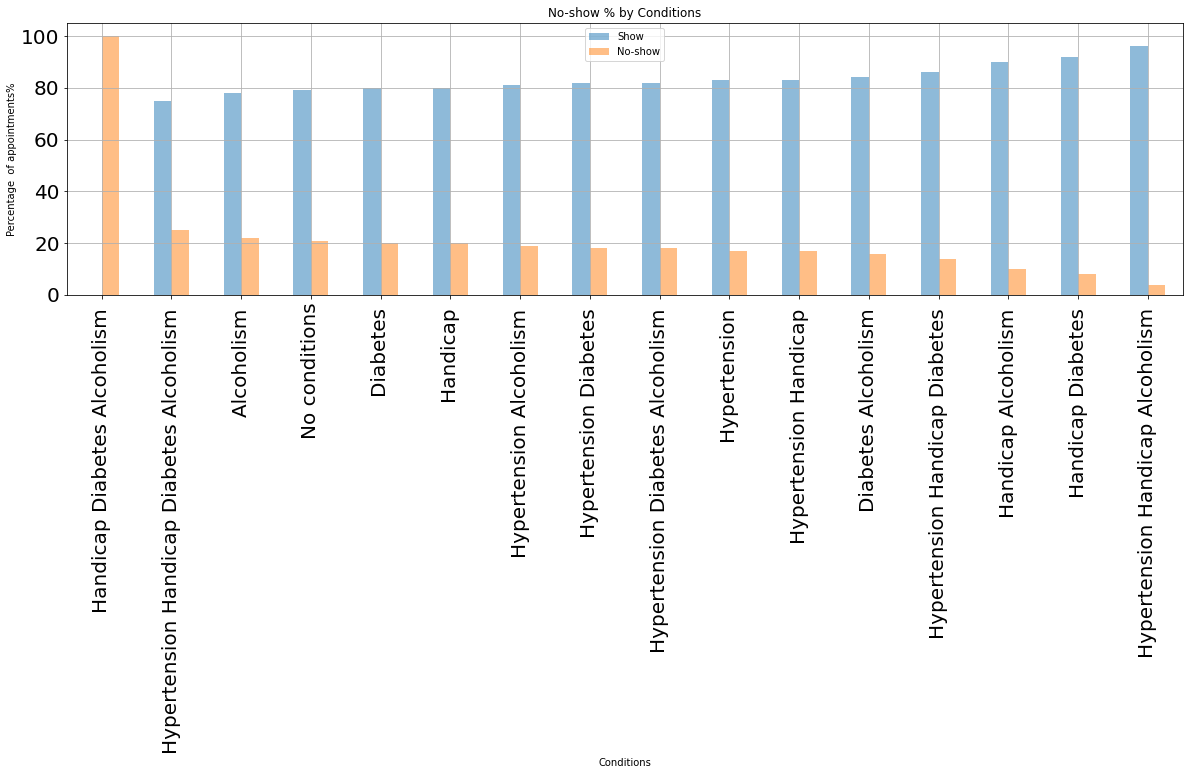

,Show,No-show,Total
Handicap Diabetes Alcoholism,NaN,100.0,1
Hypertension Handicap Diabetes Alcoholism,75.0,25.0,12
Alcoholism,78.0,22.0,1926
No conditions,79.0,21.0,84223
Diabetes,80.0,20.0,1342
Handicap,80.0,20.0,1088
Hypertension Alcoholism,81.0,19.0,1045
Hypertension Diabetes,82.0,18.0,5926
Hypertension Diabetes Alcoholism,82.0,18.0,244
Hypertension,83.0,17.0,13703


In [34]:
# creating separate series to plot the no_shows and shows percentage
df_condition_show = df_main.query('(no_show == "No")').Conditions.value_counts()
df_condition_no_show = df_main.query('(no_show == "Yes")').Conditions.value_counts()

# creating new dataframe and using the previous series divided by total value counts to get the percentage
df_con_pct = pd.DataFrame(columns=['Show', 'No-show'])

# populating the show column by dividing the show value counts by the total patients with conditions
df_con_pct['Show'] = round(df_condition_show / df_main.Conditions.value_counts() *100)

# populating the no-show column by dividing the no-show value counts by the total patients with conditions
df_con_pct['No-show'] = round(df_condition_no_show / df_main.Conditions.value_counts() *100)
df_con_pct['Total'] = df_main.Conditions.value_counts()
# getting descending order the df_con_pct by the percent of no-shows
df_con_pct = df_con_pct.sort_values(by='No-show', ascending=False)

#plotting the bar chart
df_con_pct.plot(kind='bar', title='No-show % by Conditions', y = ['Show','No-show'], fontsize=20, figsize=(20,5), alpha = 0.5, grid = True)
plt.legend(['Show', 'No-show'])
plt.xlabel('Conditions')
plt.ylabel('Percentage  of appointments%')
plt.show()


df_con_pct

#People with 4 conditions missed the most, followed by Alcholism and those with no conditions


<a id='conclusions'></a>
## Conclusions
The limitations of this study include inability to make a prediction model of no-shows (lack of understanding of advanced statistics), thus it was only possible to interpret the data visualizations based on sample size and the variables in question.

Further studies should look into building prediction model based on the sample data (KDE, regression, etc.) to predict no-shows more accurately.

Some of the factors that might predict the appointment no-shows are:
1. The Age of the patient.
2. The Gender of the patient.
3. The location.
4. The Conditions.

The SMS received factor was very ambigious, but when it's related to days of the week it showed some indication that people might miss less appointments on Mondays if they received SMS as opposed if they haven't received SMS on appointments that are on the start of weekdays. It is a weak factor so it was omitted from the list of possible factors

To answer the questions:
1. Do certain days of the week get missed more than other days? 
>Yes, Friday is missed most at 8am and 2pm

2. Do certain neighbourhoods miss more appointments? 
>Yes, Santos Dumont had highest percentage of no-shows to shows at 29% and counting to 370 no-show out of 1276 total

3. Which gender is more prone to miss appointments? 
>Females aged 20-39 missed more appointments than any other age-group, while also attending more appointments.

4. Do more patients show up if they received SMS? 
>9784 people received SMS and didn't show up, around 27.5% of the 35K who received SMS. 
> People who Receive SMS are more likely to miss appointments towards the end of the week (Friday), while people who don't receive SMS are more likely to miss on the start of the week (Monday, Tuesday)

5. Do people with certain conditions miss more appointments? 
>Yes, 22% of people missed more appointments with alcoholism than any other patients who had one condition.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb','--to html'])